# Regresión polinómica


# Importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Importamos de la librería sklearn, la función train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Importar el data set


In [2]:
dataset = pd.read_csv('../data/student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Variable que utilizaremos para predecir la variable objetivo
X = dataset.iloc[:, 0].values.reshape(-1, 1)
# Variable objetivo
y = dataset.iloc[:, 1].values

In [4]:
# Devidimos el dataset en train y test, dejando en test un tercio de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16, 1) (9, 1) (16,) (9,)


# Ajustar la regresión polinómica con el dataset

In [6]:
def polynomial_regresion(X_test, X_train, degree):
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    y_train_predict = poly_model.predict(X_train_poly)
    r2 = r2_score(y_train, y_train_predict)

    print("R2 train: {}".format(r2))

    y_test_predict = poly_model.predict(poly_features.transform(X_test))
    r2 = r2_score(y_test, y_test_predict)

    print("R2 test: {}".format(r2))
    return y_train_predict, y_test_predict

In [7]:
y_train_pred, y_test_pred = polynomial_regresion(X_test, X_train, 4)

R2 train: 0.9565479082563058
R2 test: 0.9642330762709658


# Visualización de los resultados del Modelo Lineal Polinómico

### Train

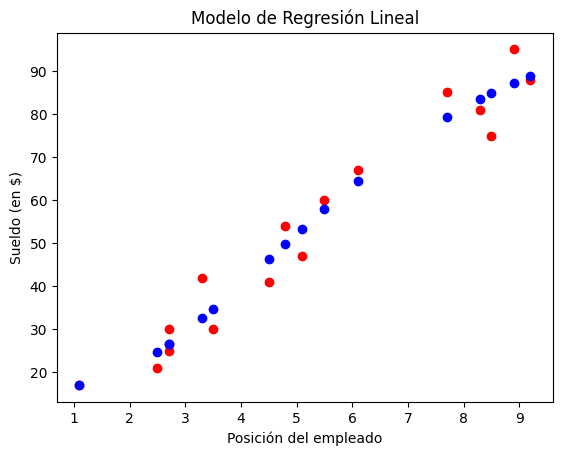

In [8]:
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_train, y_train_pred, color = "blue")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

### Test

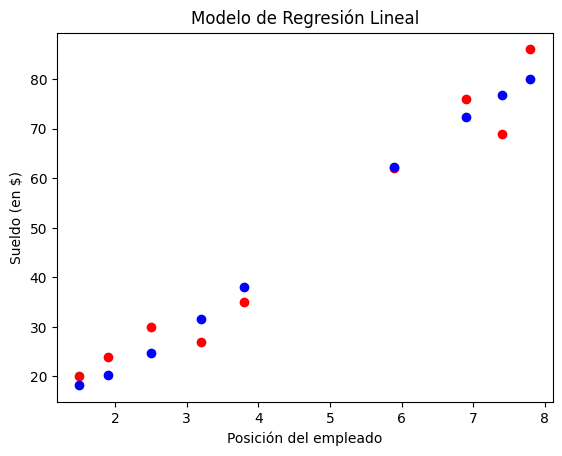

In [9]:
plt.scatter(X_test, y_test, color = "red")
plt.scatter(X_test, y_test_pred, color = "blue")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()